### Netflix Content Strategy Analysis with Python Review

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
netflix_data = pd.read_csv("netflix_content_2023.csv")

netflix_data.head()

Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  
0  81,21,00,000            English         Show  
1  66,51,00,000            English         Show  
2  62,28,00,000             Korean         Show  
3  50,77,00,000            English         Show  
4  50,30,00,000            English        Movie

In [4]:
netflix_data["Language Indicator"].value_counts()

Language Indicator
English        17268
Non-English     3252
Japanese        2297
Korean          1582
Hindi            374
Russian           39
Name: count, dtype: int64

In [5]:
netflix_data["Hours Viewed"].max()

'99,00,000'

In [6]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

Title  Hours Viewed
0            The Night Agent: Season 1   812100000.0
1            Ginny & Georgia: Season 2   665100000.0
2   The Glory: Season 1 // 더 글로리: 시즌 1   622800000.0
3                  Wednesday: Season 1   507700000.0
4  Queen Charlotte: A Bridgerton Story   503000000.0

In [7]:
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()
content_type_viewership

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

In [8]:
content_type_viewership.values

array([5.063780e+10, 1.077641e+11])

The “Hours Viewed” column has been successfully cleaned and converted to a numeric format. Now, I’ll analyze trends in content type to determine whether shows or movies dominate viewership. Let’s visualize the distribution of total viewership hours between Shows and Movies:

In [10]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Bar(
        x=content_type_viewership.index,
        y=content_type_viewership.values,
        marker_color=['skyblue', 'salmon']
    )
])

fig.update_layout(
    title='Total Viewership Hours by Content Type (2023)',
    xaxis_title='Content Type',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800
)

fig.show()

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

Next, let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption:

In [12]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

fig = go.Figure(data=[
    go.Bar(
        x=language_viewership.index,
        y=language_viewership.values,
        marker_color='lightcoral'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Language (2023)',
    xaxis_title='Language',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=45,
    height=600,
    width=1000
)

fig.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

Next, I’ll analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months:

In [37]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

netflix_data.head()

Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  Release Month  
0   812100000.0            English         Show            3.0  
1   665100000.0            English         Show            1.0  
2   622800000.0             Korean         Show           12.0  
3   507700000.0            English         Show           11.0  
4   503000000.0            English        Movie            5.0

In [15]:
netflix_data.groupby('Release Month')['Hours Viewed'].sum()

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

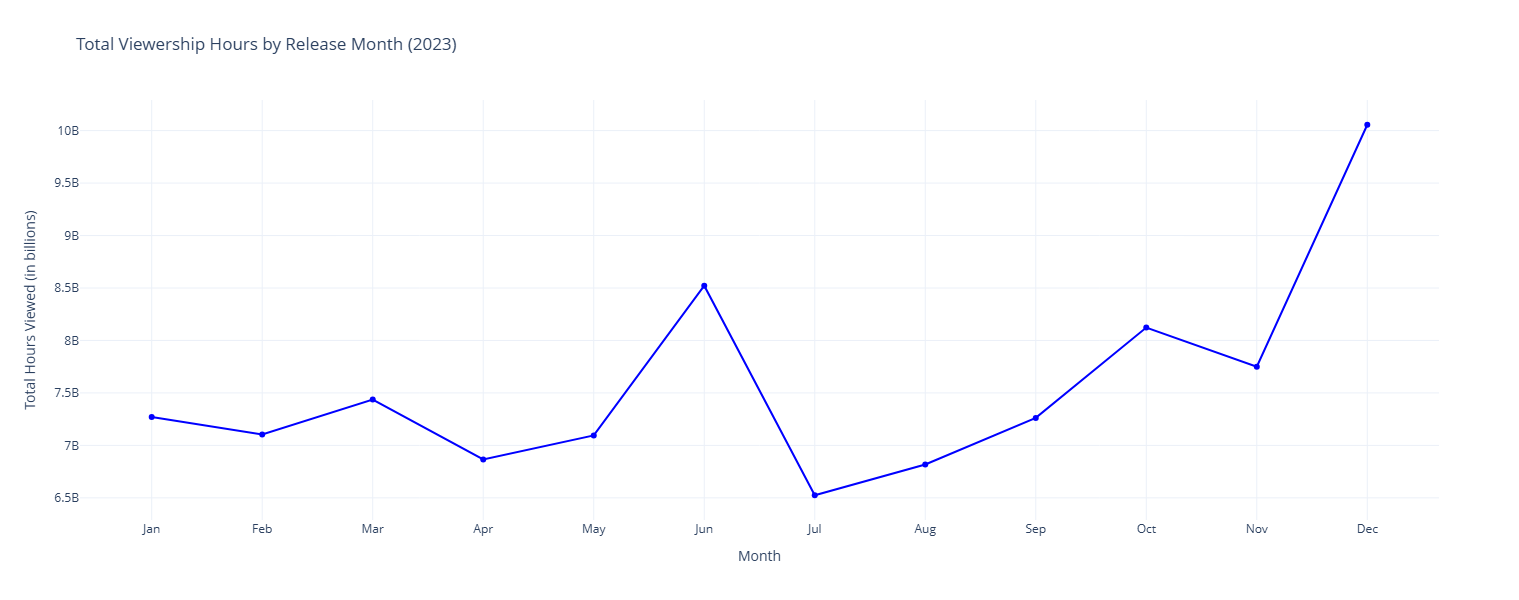

In [16]:
# convert the "Release Date" to a datetime format and extract the month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

# aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        mode='lines+markers',
        marker=dict(color='blue'),
        line=dict(color='blue')
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000
)

fig.show()

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

To delve deeper, we can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership:

In [35]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

Title  Hours Viewed  \
0                            The Night Agent: Season 1   812100000.0   
1                            Ginny & Georgia: Season 2   665100000.0   
18227  King the Land: Limited Series // 킹더랜드: 리미티드 시리즈   630200000.0   
2                   The Glory: Season 1 // 더 글로리: 시즌 1   622800000.0   
18214                              ONE PIECE: Season 1   541900000.0   

      Language Indicator Content Type Release Date  
0                English         Show   2023-03-23  
1                English         Show   2023-01-05  
18227             Korean        Movie   2023-06-17  
2                 Korean         Show   2022-12-30  
18214            English         Show   2023-08-31

The top 5 most-viewed titles on Netflix in 2023 are:

The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.

Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.

King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.

The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.

ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

Now, let’s have a look at the viewership trends by content type:

In [39]:
netflix_data.head()

Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  Release Month  
0   812100000.0            English         Show            3.0  
1   665100000.0            English         Show            1.0  
2   622800000.0             Korean         Show           12.0  
3   507700000.0            English         Show           11.0  
4   503000000.0            English        Movie            5.0

In [45]:
monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum', )
monthly_viewership_by_type

Content Type          Movie          Show
Release Month                            
1.0            2.275900e+09  4.995700e+09
2.0            1.654400e+09  5.449300e+09
3.0            2.109400e+09  5.327700e+09
4.0            2.757600e+09  4.108100e+09
5.0            2.520500e+09  4.574100e+09
6.0            3.135800e+09  5.386200e+09
7.0            1.615700e+09  4.909100e+09
8.0            2.186400e+09  4.631400e+09
9.0            2.092300e+09  5.169900e+09
10.0           3.400400e+09  4.722800e+09
11.0           1.866900e+09  5.882600e+09
12.0           2.554900e+09  7.500900e+09

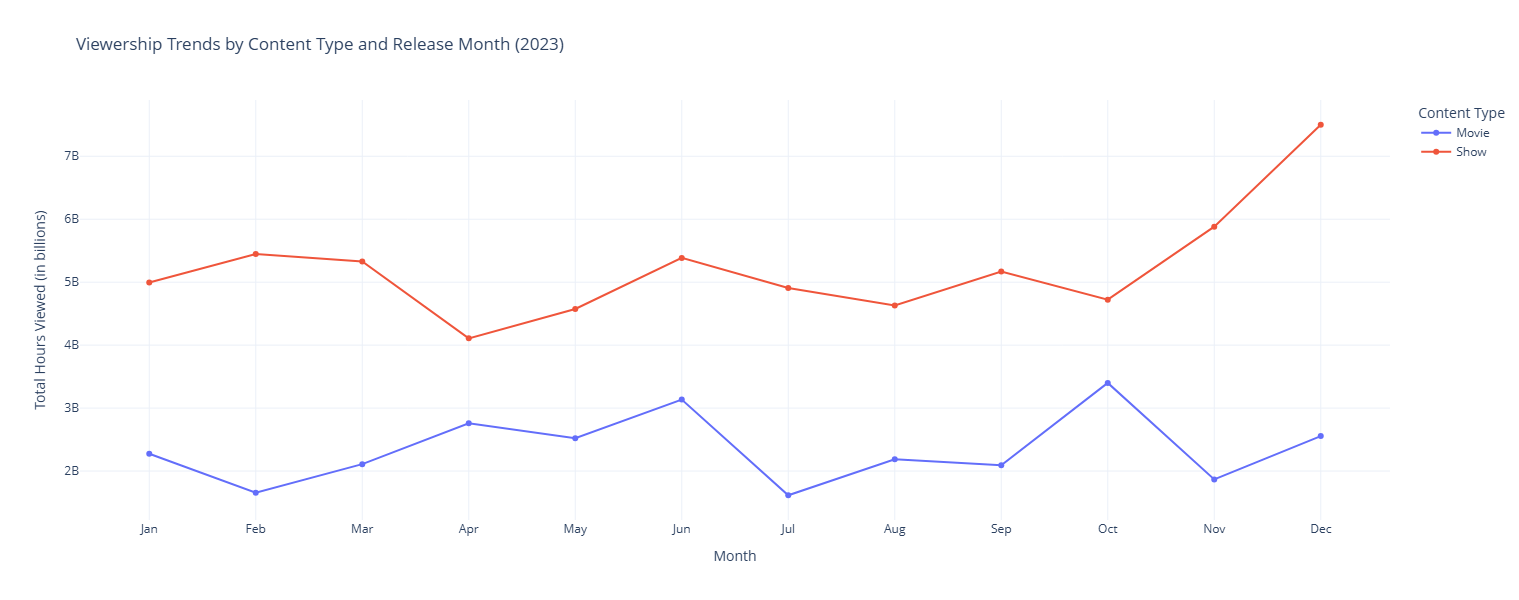

In [53]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

fig = go.Figure()

for content_type in monthly_viewership_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_viewership_by_type.index,
            y=monthly_viewership_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )

fig.update_layout(
    title='Viewership Trends by Content Type and Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000,
    legend_title='Content Type'
)

fig.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

Now, let’s explore the total viewership hours distributed across different release seasons:

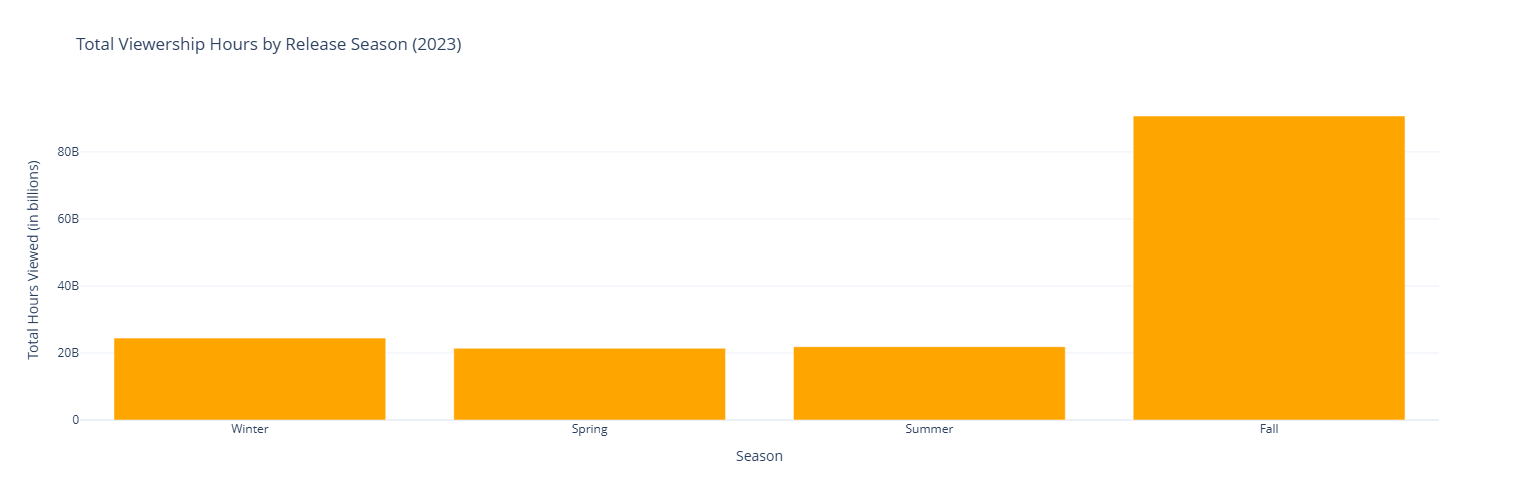

In [113]:
# define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# apply the season categorization to the dataset
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# aggregate viewership hours by release season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

fig = go.Figure(data=[
    go.Bar(
        x=seasonal_viewership.index,
        y=seasonal_viewership.values,
        marker_color='orange'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Season (2023)',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800,
    xaxis=dict(
        categoryorder='array',
        categoryarray=seasons_order
    )
)

fig.show()

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

Now, let’s analyze the number of content releases and their viewership hours across months:

In [71]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()
monthly_releases

Release Month
1.0     608
2.0     560
3.0     690
4.0     647
5.0     624
6.0     670
7.0     631
8.0     674
9.0     739
10.0    802
11.0    734
12.0    787
Name: count, dtype: int64

In [98]:
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewership

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

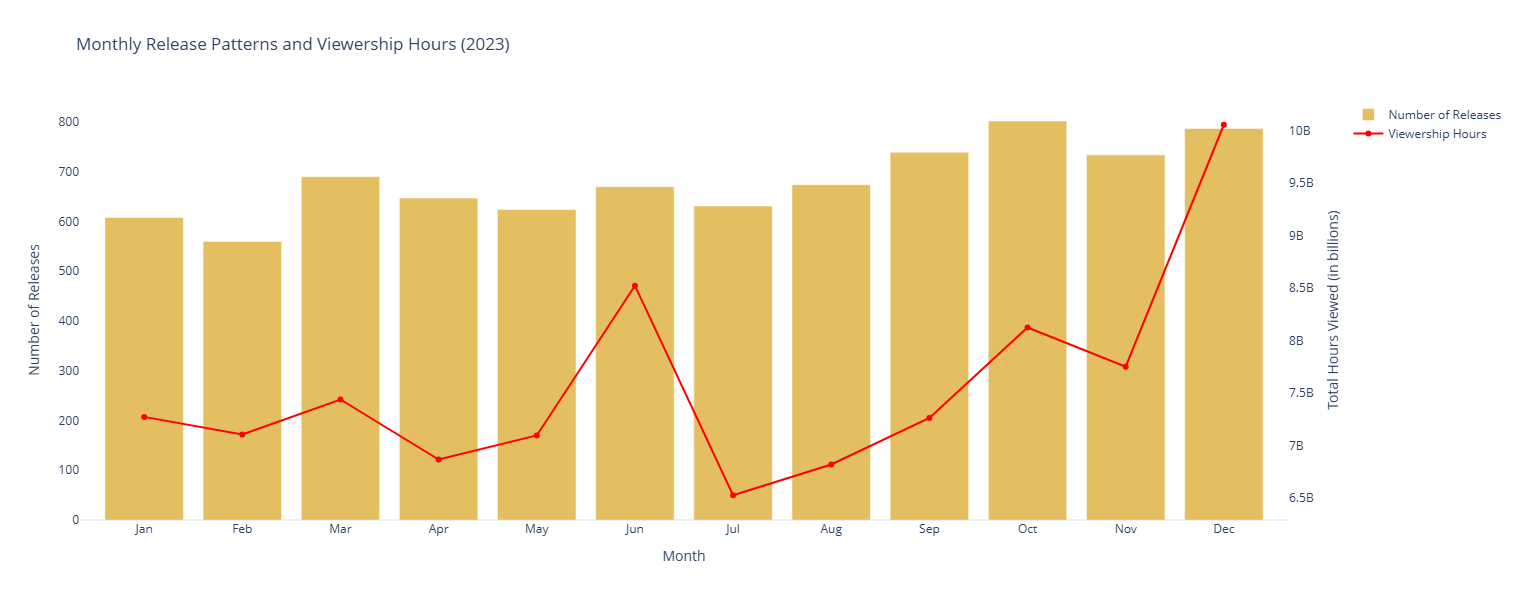

In [93]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='goldenrod', 
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:



In [101]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()
netflix_data.head()

Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  Release Month Release Season  \
0   812100000.0            English         Show            3.0         Spring   
1   665100000.0            English         Show            1.0         Winter   
2   622800000.0             Korean         Show           12.0         Winter   
3   507700000.0            English         Show           11.0           Fall   
4   503000000.0            English        Movie            5.0         Spring   

  Release Day  
0    Thursday  
1    Thursday  
2      Friday  
3   Wednesday  
4    Thursday

In [126]:
weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_releases

Release Day
Monday        436
Tuesday       995
Wednesday    1310
Thursday     1145
Friday       3863
Saturday      238
Sunday        179
Name: count, dtype: int64

In [128]:
# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_viewership

Release Day
Monday       3.954500e+09
Tuesday      5.562300e+09
Wednesday    1.574410e+10
Thursday     2.029280e+10
Friday       3.821720e+10
Saturday     5.121800e+09
Sunday       1.935300e+09
Name: Hours Viewed, dtype: float64

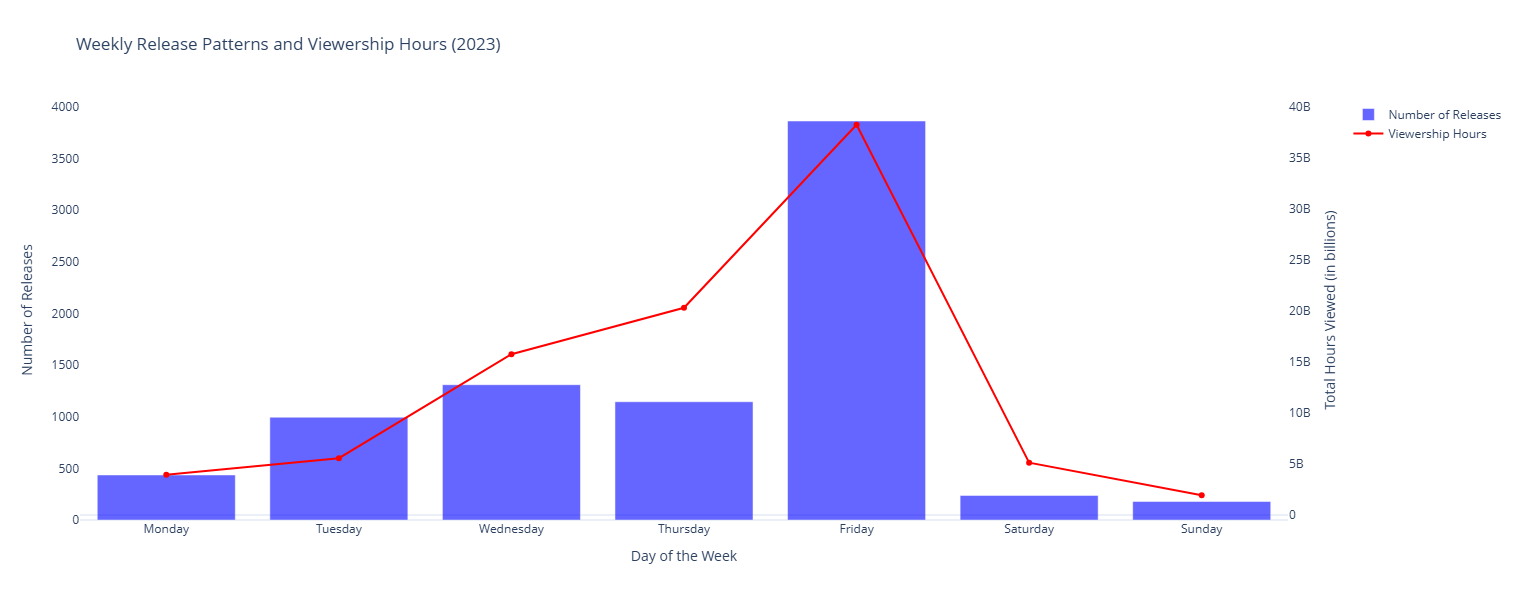

In [130]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases:

In [133]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)
important_dates

DatetimeIndex(['2023-01-01', '2023-02-14', '2023-07-04', '2023-10-31',
               '2023-12-25'],
              dtype='datetime64[ns]', freq=None)

In [135]:
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]
holiday_releases.head()

Title Available Globally?  \
2                   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   
6                           La Reina del Sur: Season 3                  No   
11                        Kaleidoscope: Limited Series                 Yes   
29                             Perfect Match: Season 1                 Yes   
124  Lady Voyeur: Limited Series // Olhar Indiscret...                 Yes   

    Release Date  Hours Viewed Language Indicator Content Type  Release Month  \
2     2022-12-30   622800000.0             Korean         Show           12.0   
6     2022-12-30   429600000.0            English         Show           12.0   
11    2023-01-01   252500000.0            English        Movie            1.0   
29    2023-02-14   176800000.0            English         Show            2.0   
124   2022-12-31    86000000.0        Non-English        Movie           12.0   

    Release Season Release Day  
2           Winter      Friday  
6           Winter      Friday  
11          Winter      Sunday  
29          Winter     Tuesday  
124         Winter    Saturday

In [137]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

Title Release Date  \
2                     The Glory: Season 1 // 더 글로리: 시즌 1   2022-12-30   
6                             La Reina del Sur: Season 3   2022-12-30   
11                          Kaleidoscope: Limited Series   2023-01-01   
29                               Perfect Match: Season 1   2023-02-14   
124    Lady Voyeur: Limited Series // Olhar Indiscret...   2022-12-31   
...                                                  ...          ...   
22324                      The Romantics: Limited Series   2023-02-14   
22327            Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5   2023-02-16   
22966  The Lying Life of Adults: Limited Series // La...   2023-01-04   
22985  Community Squad: Season 1 // División Palermo:...   2023-02-17   
24187                       Live to Lead: Limited Series   2022-12-31   

       Hours Viewed  
2       622800000.0  
6       429600000.0  
11      252500000.0  
29      176800000.0  
124      86000000.0  
...             ...  
22324     1000000.0  
22327      900000.0  
22966      900000.0  
22985      800000.0  
24187      400000.0  

[98 rows x 3 columns]

The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership. Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.

Conclusion So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.



In [146]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Release Month        8166 non-null   float64       
 7   Release Season       24812 non-null  object        
 8   Release Day          8166 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.7+ MB


In [150]:
netflix_data1 = netflix_data.dropna()

In [152]:
netflix_data1.to_csv("netflix_data_clean.csv")

## Build Model

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [159]:
df = pd.read_csv("netflix_data_clean.csv")
df.head()

Unnamed: 0                                Title Available Globally?  \
0           0            The Night Agent: Season 1                 Yes   
1           1            Ginny & Georgia: Season 2                 Yes   
2           2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   
3           3                  Wednesday: Season 1                 Yes   
4           4  Queen Charlotte: A Bridgerton Story                 Yes   

  Release Date  Hours Viewed Language Indicator Content Type  Release Month  \
0   2023-03-23   812100000.0            English         Show            3.0   
1   2023-01-05   665100000.0            English         Show            1.0   
2   2022-12-30   622800000.0             Korean         Show           12.0   
3   2022-11-23   507700000.0            English         Show           11.0   
4   2023-05-04   503000000.0            English        Movie            5.0   

  Release Season Release Day  
0         Spring    Thursday  
1         Winter    Thursday  
2         Winter      Friday  
3           Fall   Wednesday  
4         Spring    Thursday

In [ ]:
# Step 1: Prepare Data
df_model = df_new.copy()
df_model = df_model.drop(columns=["Unnamed: 0", "Title", "Release Date"])

# Define features and target
features = ["Available Globally?", "Language Indicator", "Content Type", 
            "Release Month", "Release Season", "Release Day"]
target = "Hours Viewed"
X = df_model[features]
y = df_model[target]

# Step 2: Baseline Model (Mean predictor)
baseline_pred = [y.mean()] * len(y)
baseline_mae = mean_absolute_error(y, baseline_pred)
baseline_rmse = mean_squared_error(y, baseline_pred, squared=False)

# Step 3: Preprocessing
categorical_features = ["Available Globally?", "Language Indicator", 
                        "Content Type", "Release Season", "Release Day"]
encoder = OrdinalEncoder()
X_encoded = X.copy()
X_encoded[categorical_features] = encoder.fit_transform(X[categorical_features])

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Train Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Package all results
{
    "Baseline MAE": baseline_mae,
    "Baseline RMSE": baseline_rmse,
    "Random Forest MAE": mae,
    "Random Forest RMSE": rmse
}
